<h1 style="color:red;"><strong>1. Look at the big Picture</h1>

<h2 style="color:Orange;">1.1 Frame the Problems</h2>

* **What's the business objective**

* **How does the company expect to use and benefit from the model?**

* Frame problems --> chose algorithm --> performance measure --> ways/time to tune the model

<h2 style="color:Orange;">1.2 Chose performance measure (Loss)</h2>


RMSE


<h2 style="color:Orange;">1.3 Chose performance measure (Metrics)</h2>

RMSE

<h2 style="color:Orange;">1.4 Check the Assumptions</h2>


Self-Selection bias

<h1 style="color:red;"><strong>2. Get the Data</h1>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
#-----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

c:\Users\hamin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("NFWBS_PUF_2016_data.csv")

In [3]:
# Take a look at the top 5 rows
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,FRUGALITY,AUTOMATED_1,AUTOMATED_2,ASK1_1,ASK1_2,SUBNUMERACY2,SUBNUMERACY1,CHANGEABLE,GOALCONF,LMscore,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,KHscore,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,IMPUTATION_FLAG,VALUERANGES,MORTGAGE,SAVINGSRANGES,PRODHAVE_1,PRODHAVE_2,PRODHAVE_3,PRODHAVE_4,PRODHAVE_5,PRODHAVE_6,PRODHAVE_7,PRODHAVE_8,PRODHAVE_9,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,EARNERS,VOLATILITY,SNAP,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6,COLLECT,REJECTED_1,REJECTED_2,ABSORBSHOCK,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,FRAUD2,COVERCOSTS,BORROW_1,BORROW_2,SHOCKS_1,SHOCKS_2,SHOCKS_3,SHOCKS_4,SHOCKS_5,SHOCKS_6,SHOCKS_7,SHOCKS_8,SHOCKS_9,SHOCKS_10,SHOCKS_11,SHOCKS_12,MANAGE2,PAIDHELP,HSLOC,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,OBJNUMERACY1,ON2correct,ON1correct,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3,CONNECT,HEALTH,SCFHORIZON,DISCOUNT,MEMLOSS,DISTRESS,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,OUTLOOK_1,OUTLOOK_2,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,INTERCONNECTIONS_10,PEM,HOUSESAT,SOCSEC1,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,4,6,0,0,4,3,3,3,4,3,3,1,3,2,1,1,1,1.267,3,3,2,1,1,2,4,2,1,1,1,1,1,1,1,1,1,1,2,1,1,4,0,2,2,6,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,3,2,1,1,2,0,1,1,1,1,1,1,1,0,0,4,0,0,1,0,0,8,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,3,-2,-1,4,0,1,1,1,1,1,1,3,1,0,3,5,4,80,2,3,2,0,4,2,3,3,3,2,0,0,0,0,1,0,1,1,0,0,3,4,1,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,1,5,0,0,3,2,5,5,2,3,3,1,3,2,1,1,1,-0.570,2,3,3,1,1,2,2,3,1,0,1,0,1,1,1,0,0,1,2,1,2,4,0,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,2,2,0,1,1,1,1,1,1,1,0,0,3,1,0,0,0,1,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0,0,0,1,0,0,2,1,1,3,4,3,95,3,3,1,0,3,2,4,3,2,5,0,1,0,0,0,0,0,0,0,0,4,3,-2,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,5,5,1,1,4,4,4,4,6,3,3,1,3,2,1,1,1,-0.188,3,3,1,1,2,2,2,2,1,1,1,0,1,0,1,0,1,1,1,1,2,3,0,3,2,4,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,3,3,1,2,3,0,1,1,1,1,1,1,0,0,0,4,1,0,0,0,0,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,1,3,-2,1,3,0,0,0,1,0,0,1,2,0,1,4,4,3,50,3,4,2,0,2,3,3,3,4,4,0,1,0,0,0,0,0,0,0,0,6,3,-2,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,4,6,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,2,1,0,1,-1.485,2,2,3,1,2,2,2,-1,1,0,0,0,1,0,1,0,0,1,-1,-1,-1,99,0,-2,-2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1,-1,-1,-1,-1,-1,2,2,2,2,2,2,-1,0,1,8,0,0,0,0,0,8,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,1,-1,-2,1,2,0,1,1,1,1,1,1,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,1,-1,-1,-2,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


In [5]:
df.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,FRUGALITY,AUTOMATED_1,AUTOMATED_2,ASK1_1,ASK1_2,SUBNUMERACY2,SUBNUMERACY1,CHANGEABLE,GOALCONF,LMscore,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,KHscore,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,IMPUTATION_FLAG,VALUERANGES,MORTGAGE,SAVINGSRANGES,PRODHAVE_1,PRODHAVE_2,PRODHAVE_3,PRODHAVE_4,PRODHAVE_5,PRODHAVE_6,PRODHAVE_7,PRODHAVE_8,PRODHAVE_9,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,EARNERS,VOLATILITY,SNAP,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6,COLLECT,REJECTED_1,REJECTED_2,ABSORBSHOCK,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,FRAUD2,COVERCOSTS,BORROW_1,BORROW_2,SHOCKS_1,SHOCKS_2,SHOCKS_3,SHOCKS_4,SHOCKS_5,SHOCKS_6,SHOCKS_7,SHOCKS_8,SHOCKS_9,SHOCKS_10,SHOCKS_11,SHOCKS_12,MANAGE2,PAIDHELP,HSLOC,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,OBJNUMERACY1,ON2correct,ON1correct,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3,CONNECT,HEALTH,SCFHORIZON,DISCOUNT,MEMLOSS,DISTRESS,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,OUTLOOK_1,OUTLOOK_2,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,INTERCONNECTIONS_10,PEM,HOUSESAT,SOCSEC1,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00

In [6]:
def filter_columns(df, include_strings):
    """
    Filter DataFrame columns containing any of the strings in include_strings.
    
    Args:
    df (pandas.DataFrame): Input DataFrame.
    include_strings (list): List of strings that need to be included in the column names.
    
    Returns:
    pandas.DataFrame: Filtered DataFrame.
    """
    filtered_columns = []
    for col in df.columns:
        if any(include_string in col.lower() for include_string in include_strings):
            filtered_columns.append(col)
    return df[filtered_columns]

In [7]:
df = filter_columns(df, include_strings=['fwb'])

<h1 style="color:red;"><strong>3. Data Cleaning</h1>

In [8]:
df.head(1)

,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4
0,55,3,3,3,3,2,3,2,3,2,4


In [9]:
df.columns

Index(['FWBscore', 'FWB1_1', 'FWB1_2', 'FWB1_3', 'FWB1_4', 'FWB1_5', 'FWB1_6',
       'FWB2_1', 'FWB2_2', 'FWB2_3', 'FWB2_4'],
      dtype='object')

In [10]:
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [11]:
df = rename_columns(df)

In [12]:
df.columns

Index(['fwbscore', 'fwb1_1', 'fwb1_2', 'fwb1_3', 'fwb1_4', 'fwb1_5', 'fwb1_6',
       'fwb2_1', 'fwb2_2', 'fwb2_3', 'fwb2_4'],
      dtype='object')

<h1 style="color:red;"><strong> 4. EDA</h1>

In [18]:
import sweetviz as sv

In [14]:
cat_attribs = [col for col in df.columns if len(df[col].unique()) >= 5 and len(df[col].unique()) <= 7]
bin_attribs = [col for col in df.columns if len(df[col].unique()) == 2 or len(df[col].unique()) == 1]
num_attribs = [col for col in df.columns if col not in cat_attribs and col not in bin_attribs and col != 'id']

## 4.1 Univariate

In [23]:
#analyzing the dataset
report = sv.analyze(df)
#display the report
report.show_html('univariate.html')

                                             |          | [  0%]   00:00 -> (? left)

Report univariate.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
import math

def univariate_eda_numerical(df, num_attribs):
    # Calculate the number of rows and columns for subplots
    num_plots = len(num_attribs)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=num_attribs)

    # Iterate over numerical attributes and plot histograms
    for i, column in enumerate(num_attribs):
        row = i // num_cols + 1
        col = i % num_cols + 1
        trace = go.Histogram(x=df[column], name=column)
        fig.add_trace(trace, row=row, col=col)

    # Update layout
    fig.update_layout(height=600, width=800, title_text="Histograms of Numerical Attributes")
    fig.show()

In [17]:
univariate_eda_numerical(df, num_attribs)

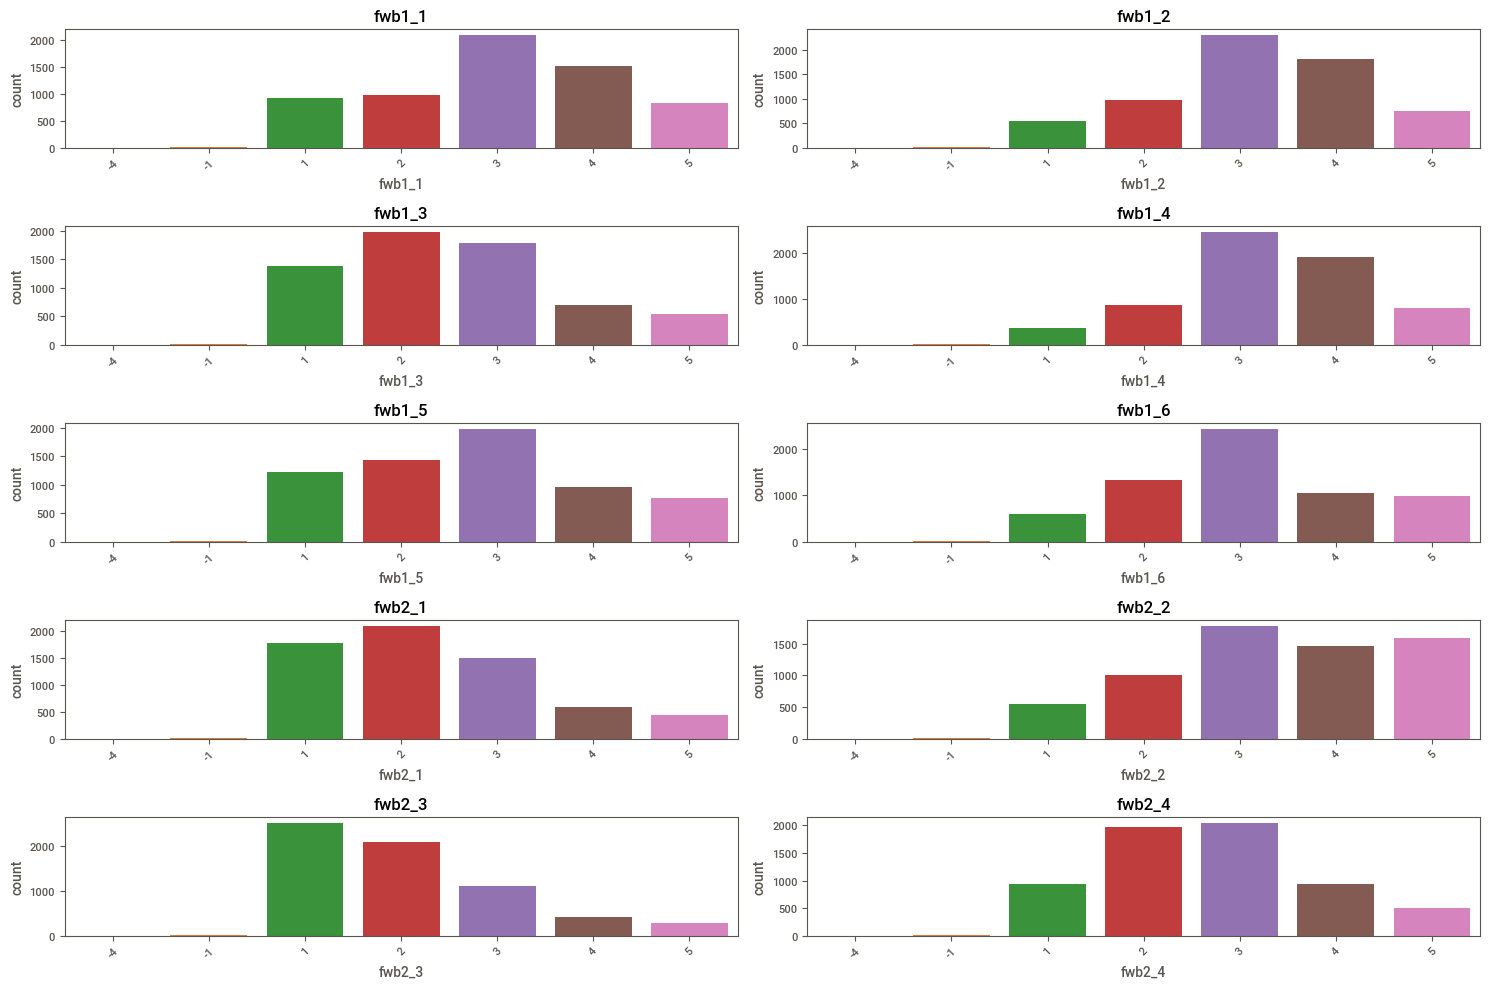

In [20]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(cat_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over binary attributes
axes = axes.flatten()

# Iterate over binary attributes and plot bar graphs
for i, column in enumerate(cat_attribs):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
def univariate_eda_categorical(df, cat_attribs):
    # Calculate the number of rows and columns for subplots
    num_plots = len(cat_attribs)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=cat_attribs)

    # Iterate over categorical attributes and plot bar graphs
    for i, column in enumerate(cat_attribs):
        row = i // num_cols + 1
        col = i % num_cols + 1
        counts = df[column].value_counts()
        trace = go.Bar(x=counts.index, y=counts.values, name=column)
        fig.add_trace(trace, row=row, col=col)
        fig.update_xaxes(title_text=column, row=row, col=col)
        fig.update_traces(showlegend=False)

    # Update layout
    fig.update_layout(height=600, width=800, title_text="Bar Graphs of Categorical Attributes",
                      legend=dict(x=0, y=-0.3))  # Adjust legend position
    fig.show()

In [25]:
univariate_eda_numerical(df, cat_attribs+bin_attribs)

## 4.2 Bivariate

In [41]:
def plot_distribution_curves(df, columns, hue_columns):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue columns using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_columns (list): List of columns to use for coloring the distribution curves.

    Returns:
        None
    """
    num_plots = len(columns) * len(hue_columns)
    fig, axes = plt.subplots(nrows=len(hue_columns), ncols=len(columns), figsize=(15, 4 * len(hue_columns)))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, hue_col in enumerate(hue_columns):
        unique_values = sorted(df[hue_col].unique()) + [5]  # Sort the unique values and include 5
        colors = sns.color_palette("husl", len(unique_values))

        for j, col in enumerate(columns):
            for k, value in enumerate(unique_values):
                sns.kdeplot(data=df[df[hue_col] == value], x=col, color=colors[k], ax=axes[i*len(columns) + j])
            axes[i*len(columns) + j].set_title(f"Distribution of {col} by {hue_col}")
            axes[i*len(columns) + j].set_xlabel(col)
            axes[i*len(columns) + j].set_ylabel('Density')
            if len(unique_values) > 6:  # Adjust legend location if there are more than 6 unique values
                axes[i*len(columns) + j].legend(unique_values, title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
            else:
                axes[i*len(columns) + j].legend(unique_values, title=hue_col)

    plt.tight_layout()
    plt.show()

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hamin\AppData\Local\Temp\ipykernel_7640\2323416560.py:24: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf 

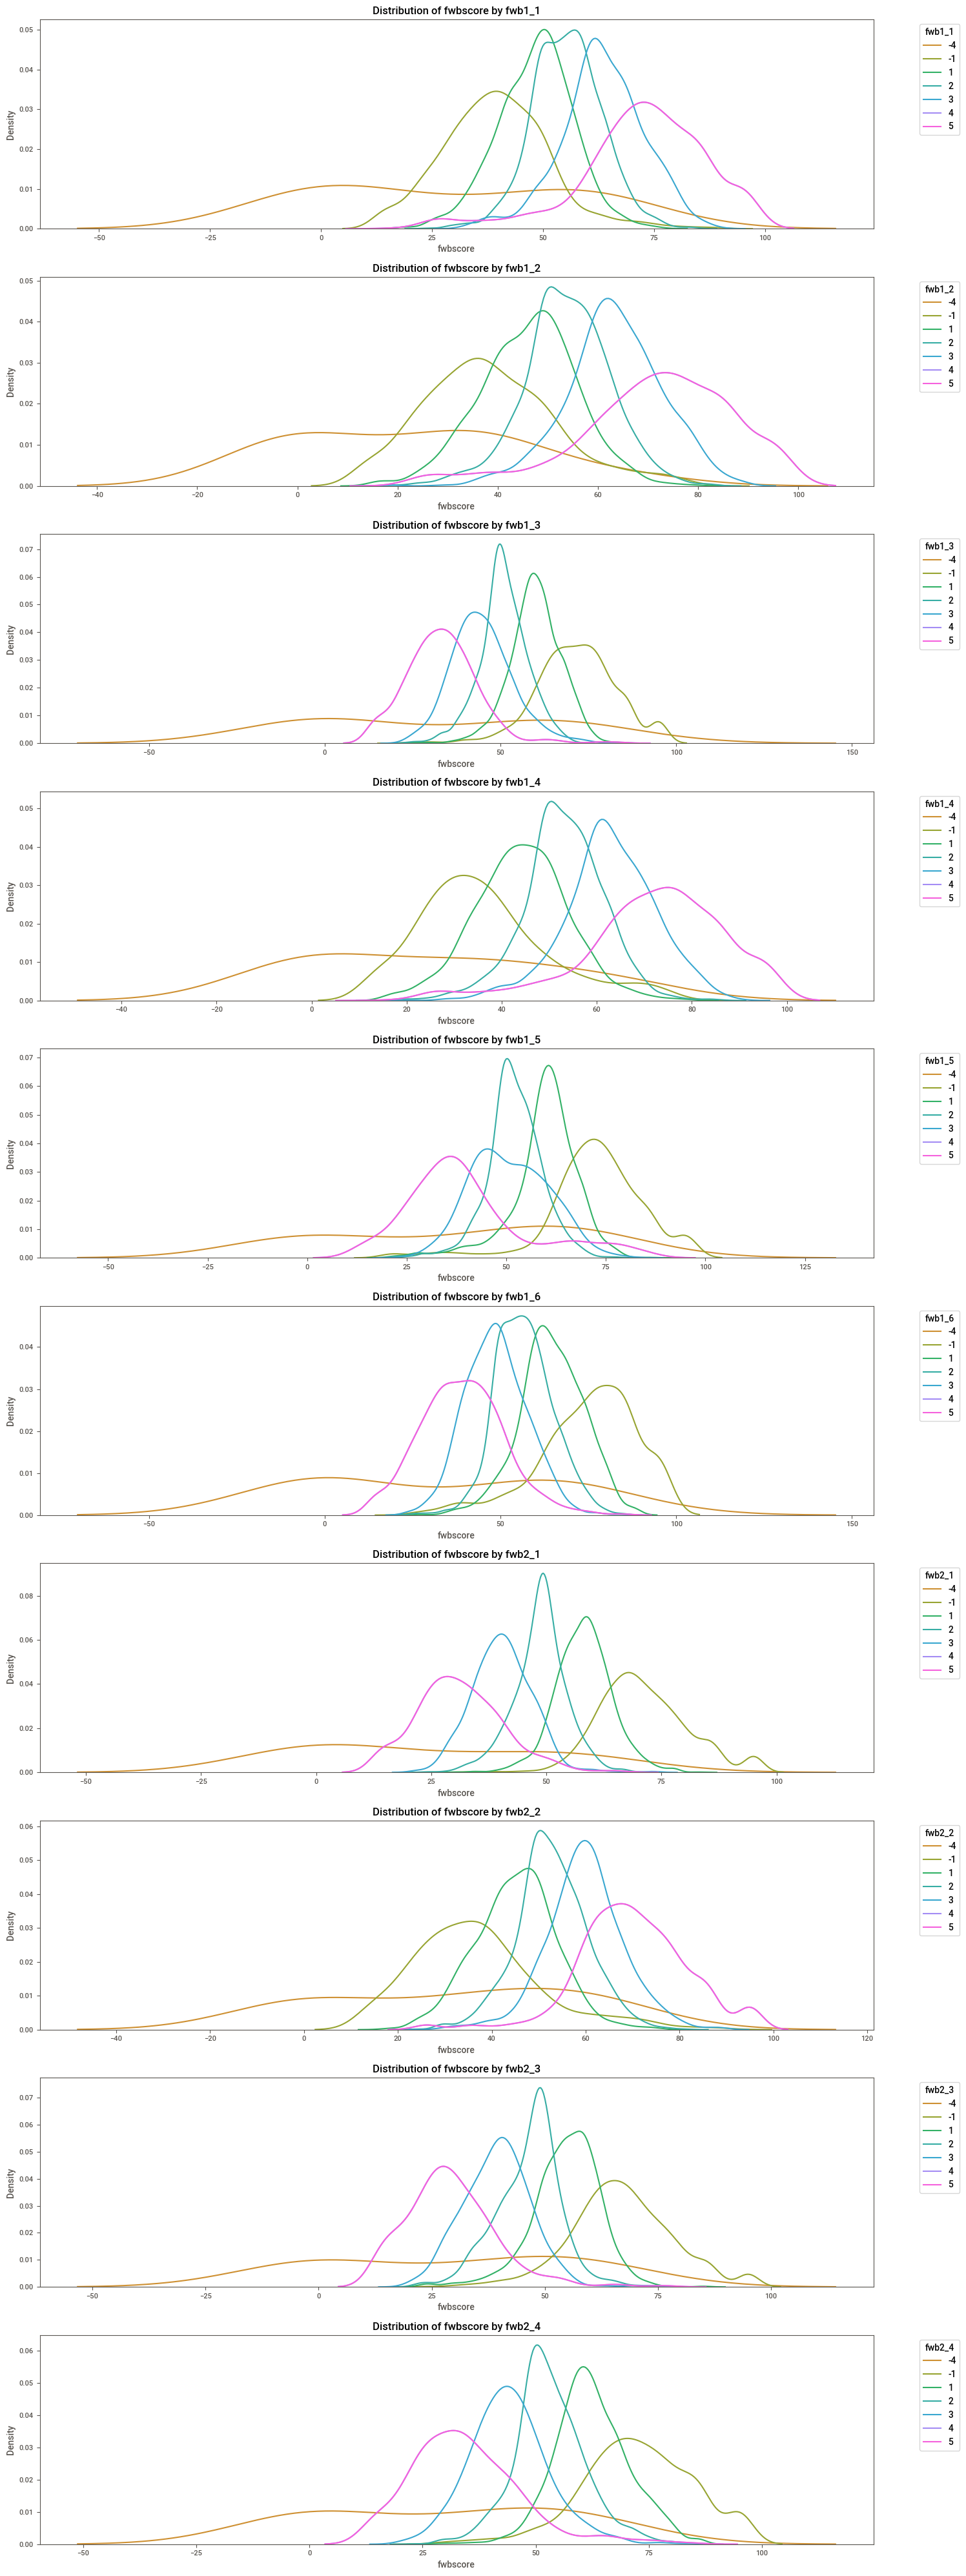

In [42]:
plot_distribution_curves(df, num_attribs, cat_attribs)

## 5.3 Multivariate

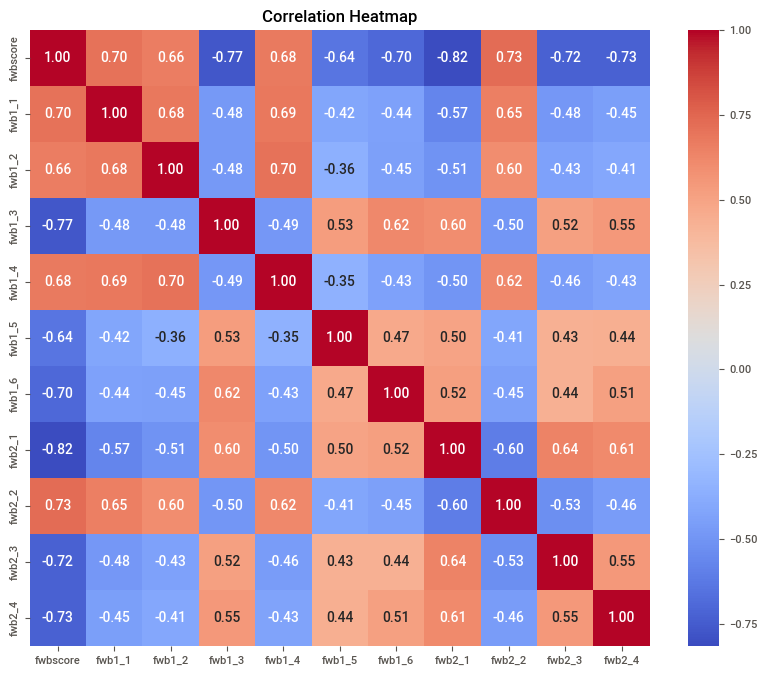

In [43]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_attribs+cat_attribs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 5. Handle Negative Values
* Drop null labels
* Drop outlier labels

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   fwbscore  6394 non-null   int64
 1   fwb1_1    6394 non-null   int64
 2   fwb1_2    6394 non-null   int64
 3   fwb1_3    6394 non-null   int64
 4   fwb1_4    6394 non-null   int64
 5   fwb1_5    6394 non-null   int64
 6   fwb1_6    6394 non-null   int64
 7   fwb2_1    6394 non-null   int64
 8   fwb2_2    6394 non-null   int64
 9   fwb2_3    6394 non-null   int64
 10  fwb2_4    6394 non-null   int64
dtypes: int64(11)
memory usage: 549.6 KB


In [45]:
df['fwb1_1'].unique()

array([ 3,  2,  5,  1,  4, -4, -1], dtype=int64)

In [48]:
def drop_negative_values(df):
    """
    Drop all values in the DataFrame that are less than 0.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        pandas.DataFrame: DataFrame with negative values dropped.
    """
    df_without_null = df[df >= 0]
    print(f"total value removed {len(df)-len(df_without_null.dropna())}")
    return df_without_null.dropna()

In [49]:
df = drop_negative_values(df)

total value removed 0


# 6. Split Train Test For Modelling

In [51]:
target_column = [col for col in df.columns if 'score' in col.lower()]

In [52]:
target_column

['fwbscore']

In [53]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train = train_set.drop(columns=target_column, errors='ignore')
train_labels = train_set[target_column]

test = test_set.drop(columns=target_column, errors='ignore')
test_labels = test_set[target_column]

In [54]:
train.head()

,fwb1_1,fwb1_2,fwb1_3,fwb1_4,fwb1_5,fwb1_6,fwb2_1,fwb2_2,fwb2_3,fwb2_4
2204,3.0,3.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0
473,4.0,4.0,3.0,4.0,2.0,3.0,2.0,4.0,1.0,2.0
3410,3.0,3.0,1.0,2.0,3.0,5.0,1.0,3.0,3.0,2.0
4234,5.0,5.0,2.0,5.0,2.0,2.0,2.0,5.0,2.0,2.0
1474,5.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0


In [55]:
train_labels.head()

,fwbscore
2204,55.0
473,62.0
3410,58.0
4234,62.0
1474,95.0


# 7. Select and Train a Model

## 7.1 Training and Evaluating on the Training Set

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

Epoch 1/100


c:\Users\hamin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 781.4279 - rmse: 22.8373 - val_loss: 95.8224 - val_rmse: 9.6306
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 91.9301 - rmse: 9.3768 - val_loss: 68.6110 - val_rmse: 8.1118
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 84.2024 - rmse: 9.0453 - val_loss: 52.1970 - val_rmse: 7.0804
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 62.2037 - rmse: 7.7426 - val_loss: 33.8344 - val_rmse: 5.7169
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45.8737 - rmse: 6.6805 - val_loss: 21.2647 - val_rmse: 4.5466
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32.7892 - rmse: 5.6520 - val_loss: 12.0577 - val_rmse: 3.4330
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27.1898 - rmse: 5.1550 - val_loss: 8.9890 - val_rmse: 2.9621
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27.4283 - rmse: 5.1587 - val_loss: 6.2351 - val_rmse: 2.4674
Epoch 9/100
128/128 ━━━━━━━━

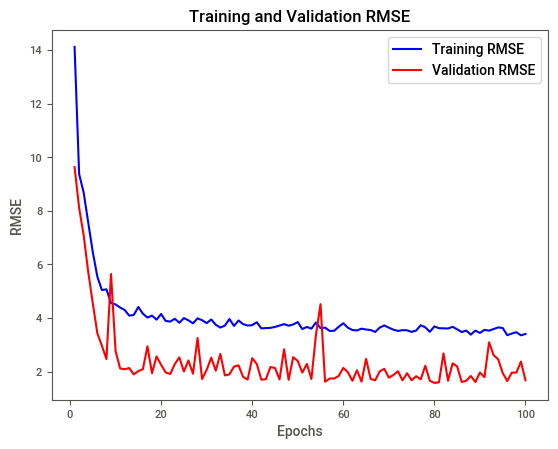

In [64]:
# Define a custom metric function for RMSE
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Step 2: Define the model
model = Sequential([
    Dense(782, activation='relu', input_shape=(train.shape[1],)),  # Input layer with 782 neurons and ReLU activation
    Dropout(0.314),  # Dropout rate of 0.314
    Dense(501, activation='relu'),  # Hidden layer with 501 neurons and ReLU activation
    Dropout(0.314),  # Dropout rate of 0.314
    Dense(1, activation='linear')  # Output layer for numerical prediction
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Using MSE loss for regression and RMSE as a metric

# Step 4: Train the model
history = model.fit(train, train_labels, epochs=100, batch_size=32, validation_split=0.2)

# Extract RMSE values from history
train_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(1, len(train_rmse) + 1)

# Plot RMSE for training and validation data
plt.plot(epochs, train_rmse, 'b', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# 8. Fine Tune Your Model

## 8.1 Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.


Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict. It will then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter)

Non of the fine tune model are as good as the orininal one

## 8.2 Randomized Search
Better when the hyperparameter space is large. This approach is the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations


## 8.3 Ensemble Methods
Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

# 9. Analyze Model and Explain Features important

## 9.1 Shapley

In [62]:
import shap

In [61]:
# explainer = shap.DeepExplainer(model, train.values)
# shap_values = explainer.shap_values(test.values)

## 9.2 Lime

In [65]:
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(train.values, 
                                                   mode='regression',
                                                   training_labels=train_labels,
                                                   feature_names=train.columns)

# Generate explanation for a specific data row
exp = explainer.explain_instance(test.values[0], 
                                  model.predict, 
                                  num_features=len(train.columns))

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

FloatingPointError: underflow encountered in exp

In [66]:
test_labels.values[0]

array([36.])

In [67]:
# Get feature importance values
feature_importance = exp.as_list()

# Sort feature importance based on absolute values
sorted_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Select top 2 most important features
top_features = sorted_importance[:2]

# Extract feature names
top_feature_names = [feature[0] for feature in top_features]

print("Top 2 most important features:")
for feature_name, importance_score in top_features:
    print(f"{feature_name}: {importance_score}")

NameError: name 'exp' is not defined

In [ ]:
test_labels.values[5]

array([43.])

# 10 Evaluate Your System on the Test Set
Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call `transform`, not `fit_transform()`, you do not want to fit the test set!), and evaluate the final model on the test set:


In [68]:
final_model = model

In [69]:
test_set

,fwbscore,fwb1_1,fwb1_2,fwb1_3,fwb1_4,fwb1_5,fwb1_6,fwb2_1,fwb2_2,fwb2_3,fwb2_4
1916,36.0,1.0,1.0,5.0,2.0,5.0,5.0,3.0,3.0,3.0,4.0
5288,71.0,4.0,4.0,1.0,4.0,1.0,1.0,3.0,4.0,1.0,1.0
5245,53.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0
4241,60.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,5.0,1.0,3.0
5906,62.0,2.0,2.0,3.0,2.0,2.0,3.0,1.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1996,59.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,3.0
5322,45.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,2.0,4.0
4841,65.0,5.0,5.0,3.0,5.0,1.0,3.0,1.0,5.0,1.0,4.0
3062,68.0,4.0,4.0,2.0,3.0,3.0,1.0,1.0,3.0,1.0,2.0


In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
test = test_set.drop(columns = target_column, axis=1)
test_labels = test_set[target_column].copy()

final_model.fit(test, test_labels)
final_predictions = final_model .predict(test)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.4510 - rmse: 3.6184
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [72]:
print(final_rmse)

1.7501706629443972


# 11. Open AI Recommendation

In [73]:
from openai import OpenAI
import pandas as pd
import os
from dotenv import load_dotenv
# see also python-decouple

In [74]:
load_dotenv()

# openai.api_key = os.environ.get("OPEN_AI")
openai_api_key = os.getenv("OPENAI_KEY")
model = "gpt-3.5-turbo-0125"

In [75]:
client = OpenAI(
    api_key = openai_api_key
#   api_key=os.environ.get("OPENAI_API_KEY")    
)

In [76]:
def return_chatgpt_introduction(data):
    message1 = [{
        "role": "user",
        "content": "Can you write 5 bullet point on how to about how to improve " + data + " , keep it simple and nice",
    }]

    chat_completion = client.chat.completions.create(
        messages=message1,
        model=model
    )
    return(chat_completion.choices[0].message.content)

In [77]:
return_chatgpt_introduction(" handle a major unexpected expense")

"1. Assess the situation: Take a deep breath and evaluate the unexpected expense. Determine the amount needed and the urgency of the situation.\n\n2. Create a budget: Make a detailed list of your expenses and income to see where you can make cuts or adjustments to cover the unexpected expense.\n\n3. Explore all options: Research different ways to cover the expense, such as tapping into savings, obtaining a personal loan, or negotiating a payment plan with the provider.\n\n4. Seek support: Don't be afraid to ask for help from friends, family, or financial advisors. They may provide valuable advice or assistance in navigating the unexpected expense.\n\n5. Learn from the experience: Take this unexpected expense as a learning opportunity to better prepare for future emergencies. Consider building an emergency fund or purchasing insurance to protect against unforeseen costs."